In [2]:
import cv2
from deepface import DeepFace

# Initialize video capture from webcam
cap = cv2.VideoCapture(0)

# List to store expression changes
expression_list = []

# Function to analyze the frame and record expressions
def analyze_frame(frame):
    try:
        # Analyze the frame for emotion detection
        result = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)

        # Check if result is a list (multiple faces detected) or a dictionary (single face)
        if isinstance(result, list):
            dominant_emotion = result[0]['dominant_emotion']  # Get the first face's emotion
        else:
            dominant_emotion = result['dominant_emotion']  # Single face's emotion

        # Record only the emotion for each frame
        expression_list.append(dominant_emotion)

    except Exception as e:
        print("Error analyzing frame: ", e)

# Read video stream and analyze in real-time
while True:
    ret, frame = cap.read()  # Capture frame-by-frame
    if not ret:
        break

    # Analyze the current frame
    analyze_frame(frame)

    # Display the frame
    cv2.imshow('Webcam', frame)

    # Press 'q' to quit the video stream
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close OpenCV window
cap.release()
cv2.destroyAllWindows()

Facial expression percent during the interview: 


Text(0.5, 1.0, 'Facial expression percent during the interview:')

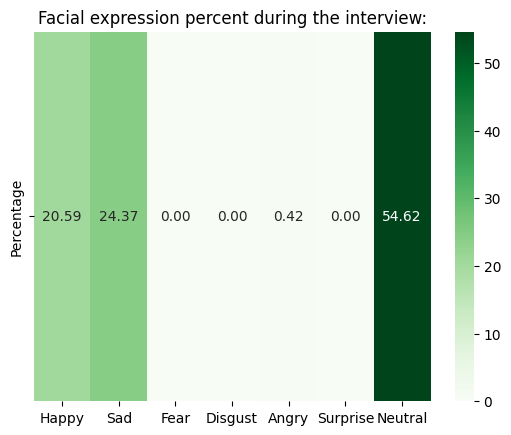

In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
happy_percent = 100*expression_list.count('happy')/len(expression_list)
sad_percent = 100*expression_list.count('sad')/len(expression_list)
fear_percent = 100*expression_list.count('fear')/len(expression_list)
disgust_percent = 100*expression_list.count('disgust')/len(expression_list)
angry_percent = 100*expression_list.count('angry')/len(expression_list)
surprise_percent = 100*expression_list.count('surprise')/len(expression_list)
neutral_percent = 100*expression_list.count('neutral')/len(expression_list)
l1 = ["Happy","Sad","Fear","Disgust","Angry","Surprise","Neutral"]
l2 = [happy_percent,sad_percent,fear_percent,disgust_percent,angry_percent,surprise_percent,neutral_percent]
data = np.array(l2).reshape(1, -1)
print("Facial expression percent during the interview: ")
sns.heatmap(data, annot=True, fmt=".2f", cmap='Greens', xticklabels=l1, yticklabels=['Percentage'])
plt.title("Facial expression percent during the interview:")